# Random Forest Regression on Startup Funding

This notebook trains a random forest regressor to predict `amount_usd`.

**What happens here**
- Load the modeling-ready dataset.
- Split into train and test sets.
- Train a random forest regressor.
- Evaluate performance with $R^2$ and RMSE.
- Visualize feature importance for the top predictors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_path = r"d:\\jjjjjj\\Intership_Calls\\Data_Processing\\startup_funding_regression_ready.csv"
df = pd.read_csv(data_path)
df.shape

(2225, 5709)

In [3]:
# Split features and target
X = df.drop(columns=["amount_usd"])
y = df["amount_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Train model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
rmse, r2

(93876572.35362415, -0.2738834779704129)

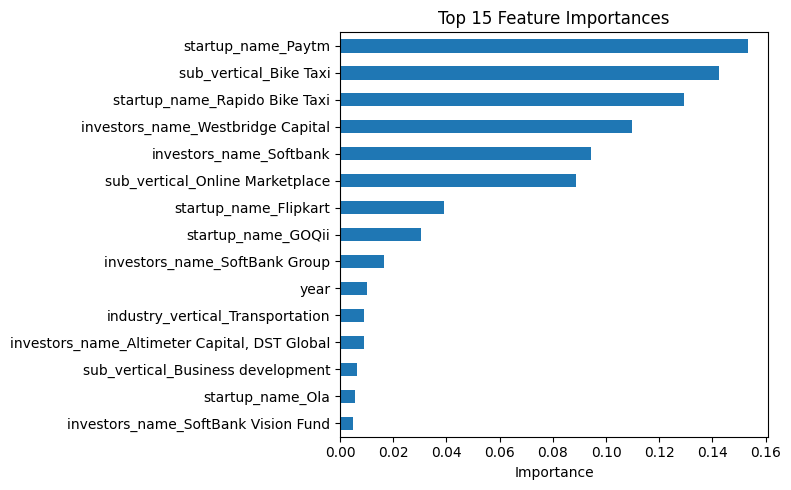

In [6]:
# Top feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_k = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
top_k.sort_values().plot(kind="barh")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()